# EDA_Super

## Internet

Empezaremos el análisis por el acceso a Internet, ya que al día de hoy es la principal rama de la empresa Super, tanto en cuanto a número de suscriptores como en cuanto a ingresos. Con base en el EDA preliminar, sabemos que las 2 tecnologías que más han crecido en los últimos años son "Cablemodem" y "Fibra óptica". Por ello, la empresa nos pide que enfoquemos el análisis en las mismas para evaluar la decisión de haber apostado por la fibra óptica, y para identificar zonas con potencial de crecimiento.

In [1]:
# Importar librerias y modulos necesarios
# Librerías de terceros
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import warnings

# Módulos y paquetes locales
from funciones import eda_inicial, get_outliers_df, get_outliers_df_provincia

# Configuraciones adicionales
sns.set() # Establecer el estilo predeterminado para seaborn.
warnings.filterwarnings("ignore") # Ignorar todas las advertencias.

In [2]:
tecno_provincia = pd.read_excel("./Datasets/Acceso a Internet fijo por tecnología y provincia.xlsx",
                                  sheet_name="Tecnologia-provincia")

tecno_provincia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2014,1,Buenos Aires,1567685,1000879,120960,16528,33824,2739876
1,2014,1,Capital Federal,445569,820161,17767,1866,14555,1299918
2,2014,1,Catamarca,24126,46,17,0,43,24232
3,2014,1,Chaco,52971,9497,30,0,58,62556
4,2014,1,Chubut,51066,539,866,10776,6974,70221


Del análisis preliminar, había surgido la presencia de numerosos outliers. Estos podían deberse a:
* Las diferencias en el número de accesos entre las provincias.
* Errores en la carga de datos.
* Inconsistencias entre los datos nacionales y provinciales, como menciona el mismo archivo para el año 2019.

Para acotar estas incertidumbres y trabajar con la información más actualizada, ceñiremos nuestro análisis al periodo 2019-2022 (12 trimestres).

In [3]:
tecno_provincia = tecno_provincia[tecno_provincia["Año"] > 2019]

Haremos un EDA inicial de este DataFrame filtrado.

In [4]:
eda_inicial(tecno_provincia)

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 576 to 863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           288 non-null    int64 
 1   Trimestre     288 non-null    int64 
 2   Provincia     288 non-null    object
 3   ADSL          288 non-null    int64 
 4   Cablemodem    288 non-null    int64 
 5   Fibra óptica  288 non-null    int64 
 6   Wireless      288 non-null    int64 
 7   Otros         288 non-null    int64 
 8   Total         288 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 22.5+ KB
None 

El número de duplicados en el DataFrame es: 0 

                Año  Trimestre     Provincia           ADSL    Cablemodem  \
count    288.000000  288.00000           288     288.000000  2.880000e+02   
unique          NaN        NaN            24            NaN           NaN   
top             NaN        NaN  Buenos Aires            NaN           NaN   
freq            NaN    

Con la información recabada hasta ahora de "tecno_provincia", podemos afirmar:
* El DataFrame tiene 288 filas y 9 columnas.
* No hay valores nulos ni duplicados.
* La información corresponde a 12 trimestres (2020 - 2022).
* Vemos que los mínimos para "Fibra óptica" y "Wireless" es 0 y para "Otros" es 29. Hagamos un análisis en busca de outliers.

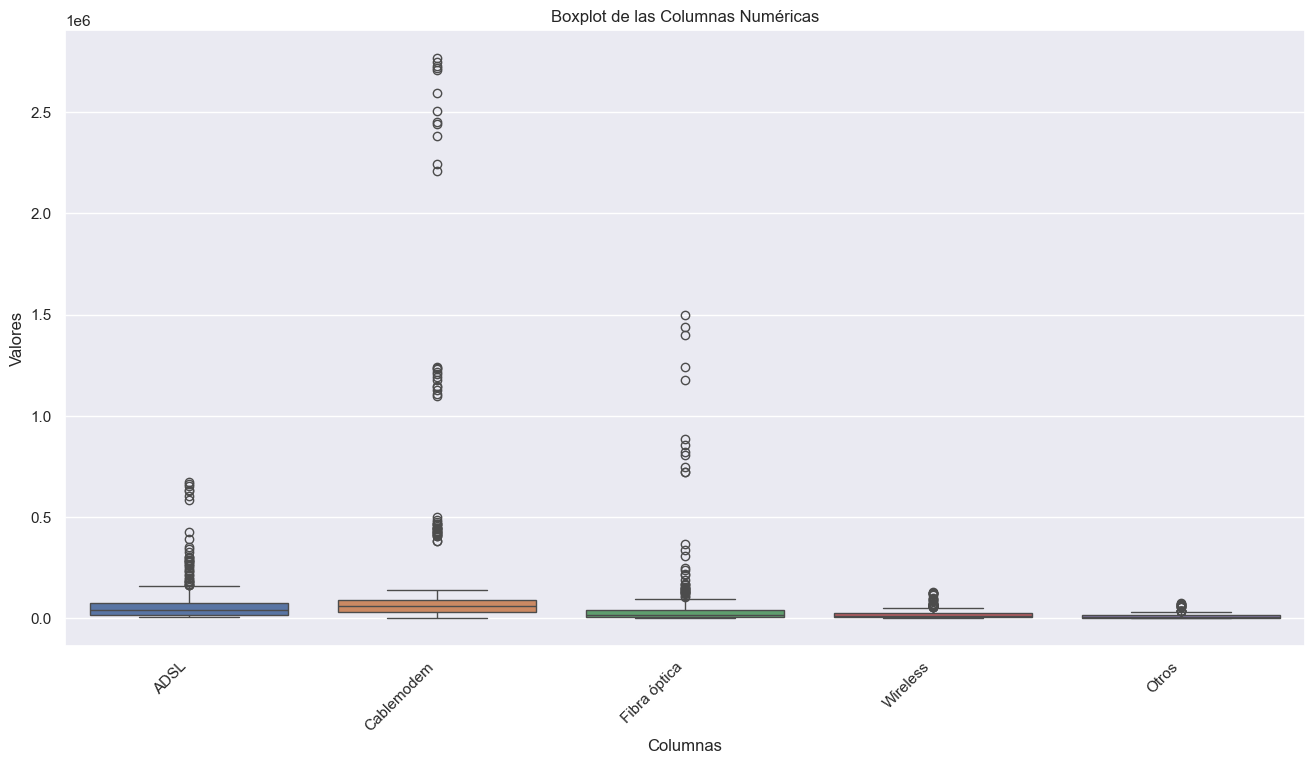

In [5]:
get_outliers_df(tecno_provincia, exclude=["Año", "Trimestre", "Total"])

Los outliers superiores no nos llaman la atención porque se encuentran dentro de los mismos ordenes de magnitud que ya habíamos establecido. Además, los valores mas altos se dan para "Cablemodem" y "Fibra óptica" que son las tecnologías populares. Sumado a esto, tenemos la variabilidad interprovincias.

Volvamos a graficar, pero cambiando la escala del eje y para ver si hay outliers por debajo del bigote inferior.

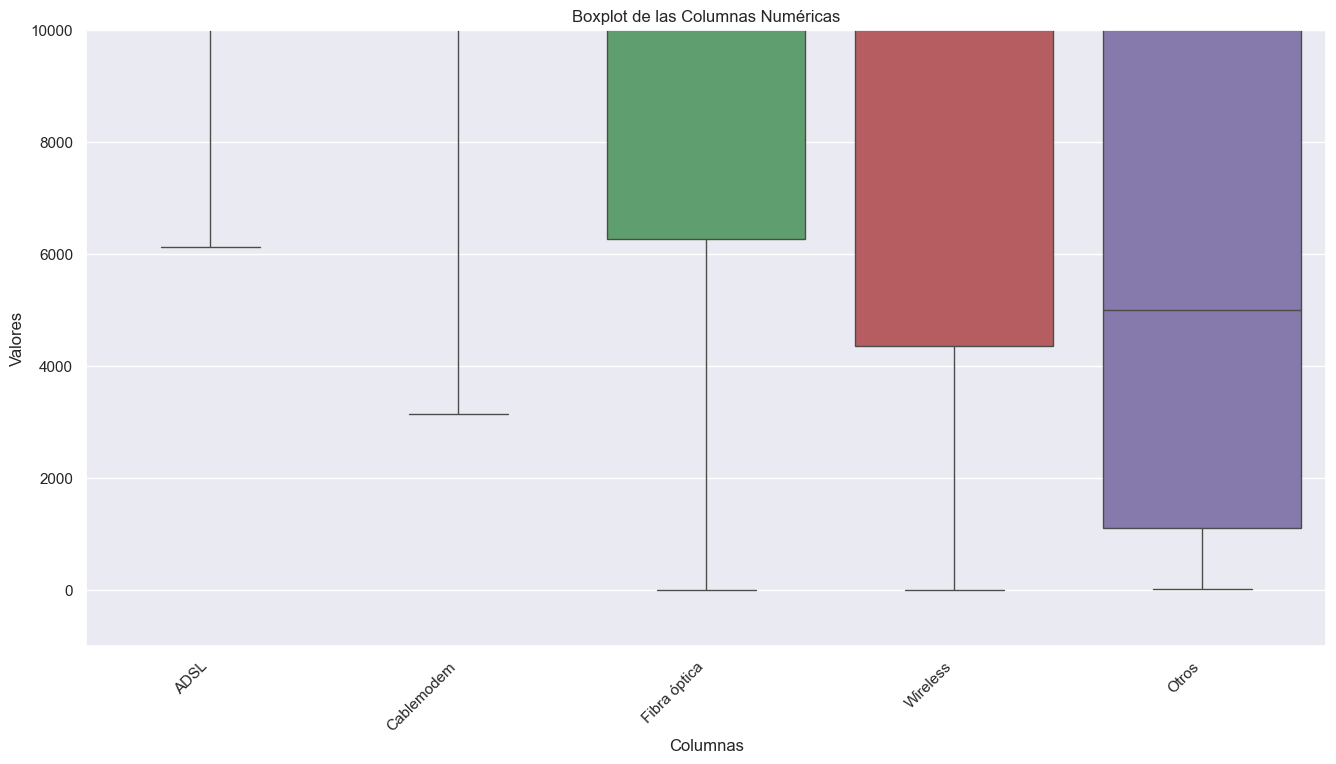

In [6]:
get_outliers_df(tecno_provincia, exclude=["Año", "Trimestre", "Total"], ylim=(-1000,10000))

A pesar de haber visto valores muy bajos al llamar la función eda_inicial(), estos no representan valores atípicos. La diferencia con el EDA preliminar que se había hecho en el primer notebook, puede deberse a la poca fiabilidad de los datos del 2019, o que al rápido crecimiento de las tecnologías causara una gran dispersión en los datos.

Ahora, para concentrarnos solo en "Cablemodem" y "Fibra óptica", vamos a agrupar las otras 3 categorías en una.

In [7]:
tecno_provincia.head(1)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
576,2020,1,Buenos Aires,673237,2210349,720688,85443,18334,3708051


In [8]:
tecno_provincia["Otras tecnologias"] = (tecno_provincia["ADSL"] 
                                        + tecno_provincia["Wireless"]
                                        + tecno_provincia["Otros"])

tecno_provincia.drop(columns=["ADSL", "Wireless", "Otros"], inplace=True)

tecno_provincia.head(3)

,Año,Trimestre,Provincia,Cablemodem,Fibra óptica,Total,Otras tecnologias
576,2020,1,Buenos Aires,2210349,720688,3708051,777014
577,2020,1,Capital Federal,1097635,38898,1353494,216961
578,2020,1,Catamarca,3146,12056,39635,24433


Para poder ver la evolución en el tiempo, crearemos la columna "Año-Trimestre".

In [9]:
# Concatenar las columnas "Año" y "Trimestre" en una nueva columna "Año-Trimestre".
tecno_provincia['Año-Trimestre'] = (
    tecno_provincia['Año'].astype(str) 
    + '-' + tecno_provincia['Trimestre'].astype(str))

# Visualizar el DataFrame con las modificaciones realizadas.
tecno_provincia.head(3)

,Año,Trimestre,Provincia,Cablemodem,Fibra óptica,Total,Otras tecnologias,Año-Trimestre
576,2020,1,Buenos Aires,2210349,720688,3708051,777014,2020-1
577,2020,1,Capital Federal,1097635,38898,1353494,216961,2020-1
578,2020,1,Catamarca,3146,12056,39635,24433,2020-1


Veamos que porcentaje del total ha ocupado cada tecnología y como eso ha ido variando.

In [10]:
tecno_por_anio_trim = tecno_provincia.groupby("Año-Trimestre")\
                                    [["Cablemodem", "Fibra óptica", "Otras tecnologias"]].sum()

tecno_por_anio_trim

,Cablemodem,Fibra óptica,Otras tecnologias
Año-Trimestre,,,
2020-1,4903674,1047817,2860935
2020-2,5005115,1106725,2919216
2020-3,5259351,1170879,2925969
2020-4,5371824,1311199,2888539
2021-1,5424782,1362976,2860214
2021-2,5641731,1472246,2749107
2021-3,5826257,1566048,2693236
2021-4,5984240,2072236,2433318
2022-1,6073426,2219533,2331050


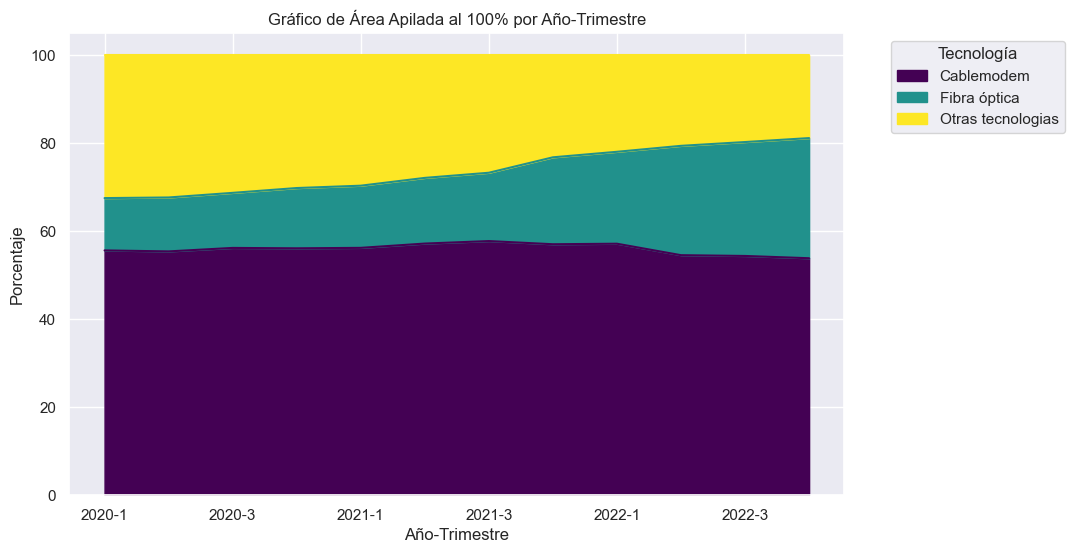

In [11]:
# Calcular el porcentaje de cada tecnología con respecto al total por trimestre
df_percentage = tecno_por_anio_trim.div(tecno_por_anio_trim.sum(axis=1), axis=0) * 100

# Crear un gráfico de área apilada al 100%
ax = df_percentage.plot(kind='area', stacked=True, colormap='viridis', figsize=(10, 6))

# Personalizar el gráfico
plt.title('Gráfico de Área Apilada al 100% por Año-Trimestre')
plt.xlabel('Año-Trimestre')
plt.ylabel('Porcentaje')
plt.legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

Vemos que "otras tecnologías" ocupan una porción cada vez menor del mercado. "Fibra óptica" está en franco crecimiento. Como observamos en el EDA preliminar, "Cablemodem" también sigue creciendo, pero al hacerlo a una velocidad menor, empieza a ocupar una porción menor del mercado. No obstante, esta porción representa más del 50%. 

En conclusión, "Cablemodem" domina el mercado pero "Fibra óptica" ha empezado a crecer a gran velocidad, por lo que considerar no solo el presente, sino la tendencia será fundamental a la hora de tomar decisiones de negocio.

Otra forma de evaluar las tendencias es usando "Google Trends", por lo que sumaremos otro dataset para aportar mas información.

In [12]:
trends = pd.read_csv("./Datasets/Google_trends.csv")

trends.head()

,Month,Cable modem,Optical fiber
0,2014-01,6,15
1,2014-02,6,20
2,2014-03,7,18
3,2014-04,6,19
4,2014-05,6,24


En este caso, se hizo la búsqueda para 2 tópicos: "Cable modem" y "Optical fiber". La ventaja de buscar por tópicos es que incluye palabras relacionadas o en otro idioma. 

La métrica obtenida se llama "Interés en el tiempo". Según Google "Los números representan el interés de búsqueda en relación con el punto más alto del gráfico para la región y el momento dados. Un valor de 100 es el pico de popularidad del término. Un valor de 50 significa que el término es la mitad de popular. Un valor de 0 significa que no hay datos suficientes para este término." 

La búsqueda se hizo para Argentina para el periodo 2014-2022. Analicemos los resultados.

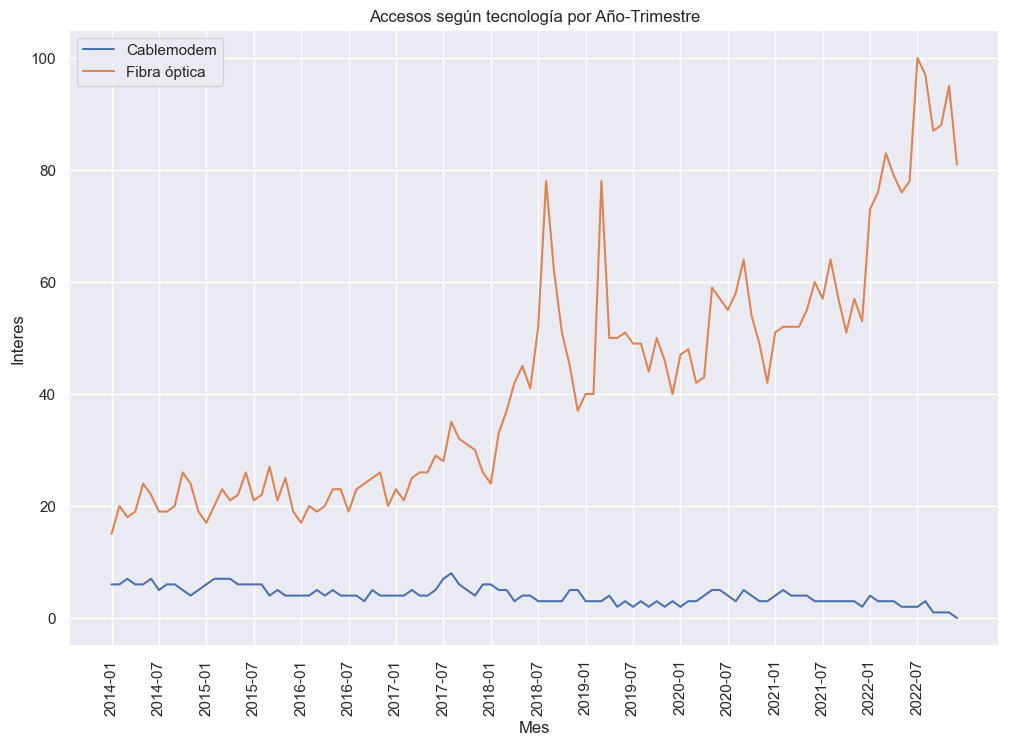

In [13]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el gráfico de líneas
sns.lineplot(x="Month", y="Cable modem", data=trends, label="Cablemodem")
sns.lineplot(x="Month", y="Optical fiber", data=trends, label="Fibra óptica")


# Personalizar el título y las etiquetas de los ejes
plt.title("Accesos según tecnología por Año-Trimestre")
plt.xlabel("Mes")
plt.ylabel("Interes")

# Girar etiquetas del eje x
plt.xticks(rotation=90)
plt.xticks(ticks=trends["Month"][::6])

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

Vemos que al igual que la adopción, el interés por la Fibra óptica ha aumentado, mientras que aquel por el Cablemodem ha disminuido levemente. Todo parece apuntar a que la mejor estrategia es orientar la inversión hacia el desarrollo de Fibra óptica.

Habiendo establecido esto, nos enfocaremos en cuales son las zonas con mayor potencial de crecimiento. Ya sabemos la cantidad de accesos por Fibra óptica en cada provincia. Cruzaremos esta información con la población de cada provincia para evaluar la penetración en las mismas. Obtendremos esta información del [informe provisional](https://censo.gob.ar/wp-content/uploads/2023/02/cnphv2022_resultados_provisionales.pdf) emitido por INDEC en Enero de 2023, respecto al censo 2022.

In [14]:
poblacion = pd.read_excel("./Datasets/Provincia_poblacion.xlsx")

poblacion.head()

,Provincia,Población
0,Buenos Aires,17569053
1,Capital Federal,3120612
2,Catamarca,429556
3,Chaco,1142963
4,Chubut,603120


Ahora uniremos ambas tablas.

In [15]:
tecno_pcia = tecno_provincia.merge(poblacion, on="Provincia", how="inner")

tecno_pcia.head(3)

,Año,Trimestre,Provincia,Cablemodem,Fibra óptica,Total,Otras tecnologias,Año-Trimestre,Población
0,2020,1,Buenos Aires,2210349,720688,3708051,777014,2020-1,17569053
1,2020,2,Buenos Aires,2244277,723072,3777546,810197,2020-2,17569053
2,2020,3,Buenos Aires,2384557,749087,3937277,803633,2020-3,17569053


Calcularemos ahora los accesos por Fibra óptica cada 100 habitantes.

In [16]:
tecno_pcia["Accesos por cada 100 hab (Fibra óptica)"] = (
    (tecno_pcia["Fibra óptica"]/tecno_pcia["Población"])*100)

tecno_pcia.tail(3)

,Año,Trimestre,Provincia,Cablemodem,Fibra óptica,Total,Otras tecnologias,Año-Trimestre,Población,Accesos por cada 100 hab (Fibra óptica)
285,2022,2,Tucumán,15327,148823,254527,90377,2022-2,1703186,8.737918
286,2022,3,Tucumán,18518,162345,263117,82254,2022-3,1703186,9.531842
287,2022,4,Tucumán,20668,168717,263422,74037,2022-4,1703186,9.905964


Para poder ver situación actual de cada provincia y el potencial de crecimiento, graficaremos para el último trimestre de 2022, la población y los accesos cada 100 habitantes de la fibra óptica.

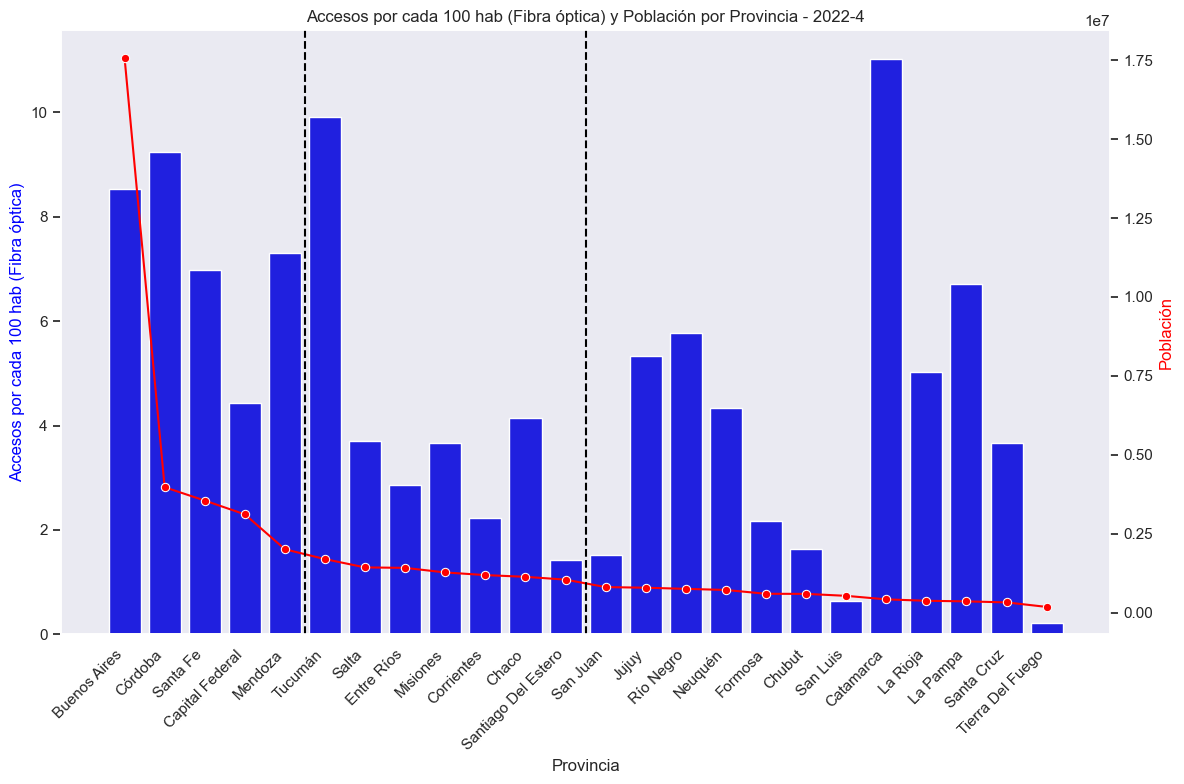

In [17]:
# Filtrar el DataFrame para obtener solo los datos del cuarto trimestre de 2022
tecno_pcia_subset = tecno_pcia[tecno_pcia["Año-Trimestre"] == "2022-4"]

# Ordenar el DataFrame por "Población" de mayor a menor
tecno_pcia_subset = tecno_pcia_subset.sort_values(by="Población", ascending=False)

# Crear una figura y ejes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Graficar barras en el eje izquierdo con el orden especificado
sns.barplot(x="Provincia", y="Accesos por cada 100 hab (Fibra óptica)", data=tecno_pcia_subset, ax=ax1, color="blue", order=tecno_pcia_subset["Provincia"])

# Crear un segundo eje y derecho
ax2 = ax1.twinx()

# Quitar la grilla horizontal
ax1.yaxis.grid(False)
ax2.yaxis.grid(False)

# Graficar línea en el eje derecho
sns.lineplot(x="Provincia", y="Población", data=tecno_pcia_subset, ax=ax2, color="red", marker="o", sort=False)

# Añadir una línea vertical entre "Mendoza" y "Tucumán"
linea_vertical_x = tecno_pcia_subset.index[tecno_pcia_subset["Provincia"] == "Tucumán"].tolist()[0] - 282.5  # Ajuste para centrar la línea
plt.axvline(x=linea_vertical_x, color='black', linestyle='--')

# Añadir una línea vertical entre "Santiago Del Estero" y "San Juan"
linea_vertical_x2 = tecno_pcia_subset.index[tecno_pcia_subset["Provincia"] == "San Juan"].tolist()[0] - 203.5  # Ajuste para centrar la línea
plt.axvline(x=linea_vertical_x2, color='black', linestyle='--')

# Rotar las etiquetas del eje x para una mejor legibilidad
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

# Añadir etiquetas y título
ax1.set_xlabel("Provincia")
ax1.set_ylabel("Accesos por cada 100 hab (Fibra óptica)", color="blue")
ax2.set_ylabel("Población", color="red")
plt.title("Accesos por cada 100 hab (Fibra óptica) y Población por Provincia - 2022-4")

# Ajustar diseño para evitar solapamiento
fig.tight_layout()

# Mostrar el gráfico
plt.show()


En este gráfico las poblaciones están ordenadas por población decreciente. Podemos dividir el análisis en 3 secciones: 
* ___Sección 1:__ Desde Buenos Aires hasta Mendoza (poblaciones mayores a 2 millones).
* __Sección 2:__ Desde Tucumán hasta Santiago Del Estero (pobaciones entre 1 y 2 millones).
* __Sección 3:__ Desde San Juan hasta Tierra del Fuego (población menores a 1 millón.)

Las oportunidades de crecimiento se darán en aquellas provincias donde la penetración de la fibra óptica sea baja y la población sea alta, porque indica que todavía hay una gran parte del mercado para cautivar.

Para la primera sección, la provincia que mas se destaca es Capital Federal, por su alta población y baja penetración del servicio de fibra óptica. Sabemos además que es un polo de servicios a nivel nacional por lo que los requerimientos del servicio de internet a alta velocidad son altos. Al contrastar este dato, con que es la provincia con mayor penetración en cuanto a accesos cada 100 habitantes, surge que la mayoría de los accesos en esta provincia no corresponden a Fibra óptica, lo que refuerza la idea de su potencial para el crecimiento del negocio.

En la segunda sección, donde todas las poblaciones son aproximadamente similares entre sí, se destacan Santiago del Estero y Corrientes como aquellas con menor pentración del servicio. Entre Rios, Misiones y Chaco también pueden representar buenas opciones, porque la penetración es baja, y limitan con corrientes, por lo que la extensión de la red de fibra óptica podría ser menos costosa.

En la tercera sección, donde el número de habitantes también es similar, Tierra del Fuego es aquella con menor penetración. Sin embargó, debe considerarse que aquí se está incorporando la porción de la Antártida Argentina e islas del Antártico Sur, por lo que la extensión y las distancias pueden causar que la logística sea demasiado costosa. Formosa, por su baja penetración de fibra óptica y cercanía geográfica (conforma el nordeste argentino (NEA) junto con Chaco, Corrientes y Misiones), sería una zona a privilegiar en el desarrollo de la red.

En resumen, considerando penetración del servicio de fibra óptica, población total y geografía, se sugiere priorizar la inversión en fibra óptica en las siguientes provincias:
* Capital Federal
* Santiago Del Estero
* Corrientes
* Entre Rios
* Misiones
* Chaco
* Formosa

Podemos visualizarlas a continuación.

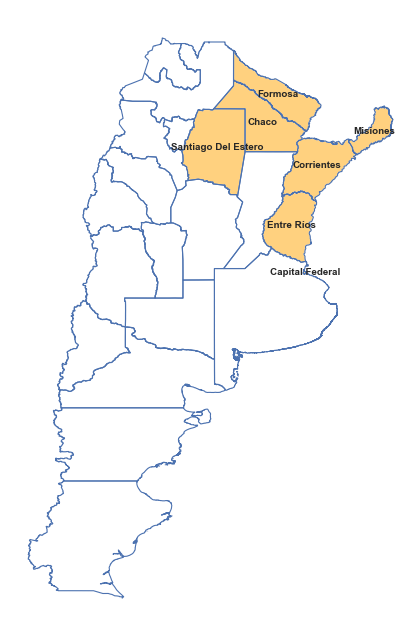

In [18]:
# Cargar el archivo JSON con las coordenadas
file_path = "./Datasets/Provincia_coordenadas.json"
gdf = gpd.read_file(file_path)

# Excluir la Antártida para visualizar mejor.
gdf = gdf[gdf["nam"] != "Tierra del Fuego, Antártida e Islas del Atlántico Sur"]

# Lista de provincias a resaltar
provincias_a_resaltar = ["Capital Federal", "Santiago Del Estero", "Corrientes", "Entre Ríos", "Misiones", "Chaco", "Formosa"]

# Crear una columna para identificar las provincias a resaltar
gdf["resaltar"] = gdf["nam"].isin(provincias_a_resaltar)

# Crear el mapa base
fig, ax = plt.subplots(figsize=(12, 8))
gdf.boundary.plot(ax=ax, linewidth=0.8)

# Resaltar las provincias específicas
gdf[gdf["resaltar"]].plot(ax=ax, color='orange', alpha=0.5)

# Añadir etiquetas de provincia solo para las provincias a resaltar con un tamaño menor y negrita
for x, y, label in zip(gdf[gdf["resaltar"]].geometry.centroid.x, gdf[gdf["resaltar"]].geometry.centroid.y, gdf[gdf["resaltar"]]["nam"]):
    ax.text(x, y, label, fontsize=7, ha='center', va='center', fontweight='bold')

# Configurar el aspecto del mapa
ax.set_aspect('equal')
plt.axis('off')

# Mostrar el mapa
plt.show()

## TV por cable

Tomaremos un datates de la página de ENACOM. El mismo contiene 2 hojas:
* Penetracion_totales_TV: Penetración de TV por Cable por cada 100 habitantes (total país).
* Penetracion_provincia_TV: Penetración de TV por Cable por cada 100 habitantes, por provincia.

### Penetracion_totales_TV

In [19]:
penetracion_totales_tv = pd.read_excel("./Datasets/Television.xlsx", 
                                       sheet_name="Penetracion_totales_TV")

penetracion_totales_tv.head()

,Año,Trimestre,Accesos TV por suscripción por cada 100 hab
0,2014,1,12.736339
1,2014,2,15.089284
2,2014,3,15.115820
3,2014,4,15.181907
4,2015,1,14.860218


Haremos un EDA inicial del DataFrame.

In [20]:
eda_inicial(penetracion_totales_tv)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Año                                          36 non-null     int64  
 1   Trimestre                                    36 non-null     int64  
 2   Accesos TV por suscripción por cada 100 hab  36 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 992.0 bytes
None 

El número de duplicados en el DataFrame es: 0 

               Año  Trimestre  Accesos TV por suscripción por cada 100 hab
count    36.000000  36.000000                                    36.000000
mean   2018.000000   2.500000                                    15.572237
std       2.618615   1.133893                                     0.747344
min    2014.000000   1.000000                                    12.736339
25%    2016.000000   1.750000              

Con la información recabada hasta ahora de "penetracion_totales_tv", podemos afirmar:
* El DataFrame tiene 36 filas y 3 columnas.
* No hay valores nulos ni duplicados.
* La información corresponde a 36 trimestres (2014 - 2022).
* A primera vista, no se observan irregularidades en los datos.

Vamos a crear la columna "Año-Trimestre" para hacer un análisis temporal.

In [21]:
# Concatenar las columnas "Año" y "Trimestre" en una nueva columna "Año-Trimestre".
penetracion_totales_tv['Año-Trimestre'] = (
    penetracion_totales_tv['Año'].astype(str) 
    + '-' + penetracion_totales_tv['Trimestre'].astype(str))

# Visualizar el DataFrame con las modificaciones realizadas.
penetracion_totales_tv.head(3)

,Año,Trimestre,Accesos TV por suscripción por cada 100 hab,Año-Trimestre
0,2014,1,12.736339,2014-1
1,2014,2,15.089284,2014-2
2,2014,3,15.115820,2014-3


Vamos a graficar un boxplot para detectar la presencia de outliers en "Accesos TV por suscripción por cada 100 hab".

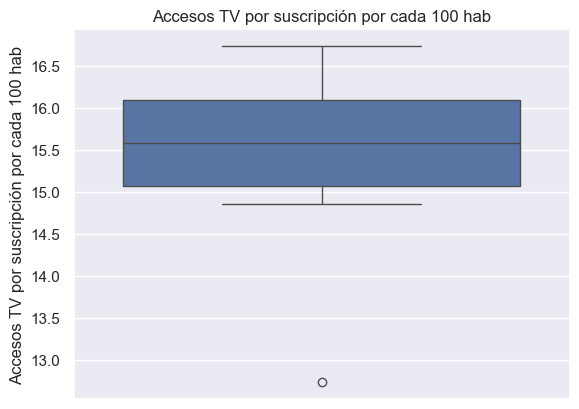

In [22]:
# Crear el boxplot.
sns.boxplot(data=penetracion_totales_tv, y="Accesos TV por suscripción por cada 100 hab")
plt.title("Accesos TV por suscripción por cada 100 hab");

Observamos que la distribución de la variable es poco dispersa (CV = 0.047) por lo que el valor mínimo, de 12.74, aparece como outlier. Veamos si esto responde a la evolución en el tiempo.

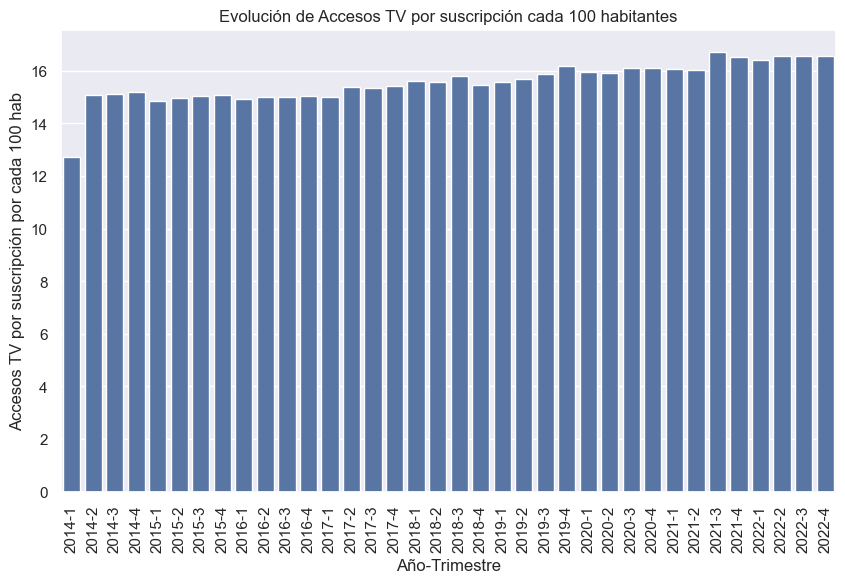

In [23]:
# Configura el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crea el gráfico de barras horizontales
ax = sns.barplot(x="Año-Trimestre", y="Accesos TV por suscripción por cada 100 hab",
                  data=penetracion_totales_tv)

# Rotar las etiquetas del eje X en 90 grados
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Personaliza el título
plt.title("Evolución de Accesos TV por suscripción cada 100 habitantes");

Vemos que el primer punto de la serie no parece seguir la misma tendencia que el resto. A fin de aunar criterios con el análisis de acceso a Internet, ceñiremos nuestro estudio al periodo 2020-2022.

In [24]:
penetracion_totales_tv = penetracion_totales_tv[penetracion_totales_tv["Año"] > 2019]

Volvamos a graficar, enfocandonos en los últimos 3 años completos.

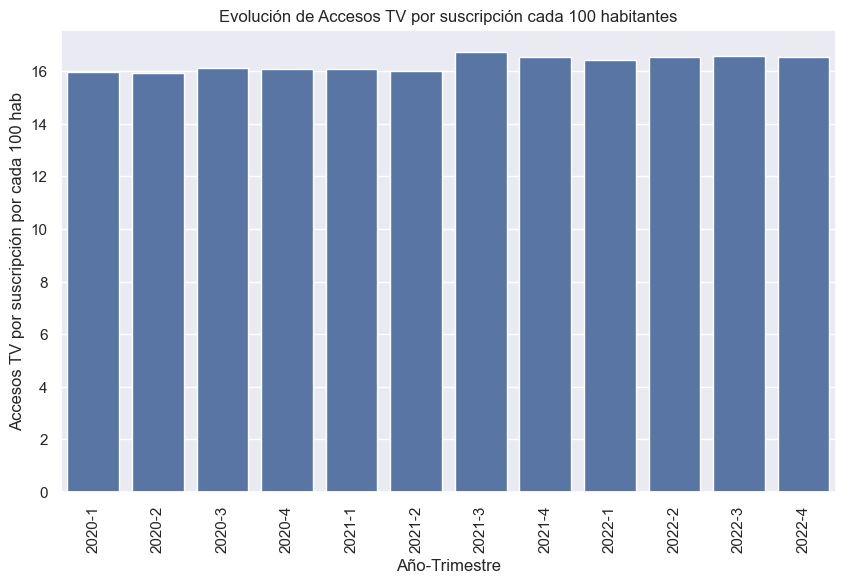

In [25]:
# Configura el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crea el gráfico de barras horizontales
ax = sns.barplot(x="Año-Trimestre", y="Accesos TV por suscripción por cada 100 hab",
                  data=penetracion_totales_tv)

# Rotar las etiquetas del eje X en 90 grados
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Personaliza el título
plt.title("Evolución de Accesos TV por suscripción cada 100 habitantes");

Vemos que la penetración del servicio de TV por cable ha sido casi constante en este periodo. Esto abona a la decisión tomada por la empresa de concentrar sus recursos en el servicio de Internet. No obstante, el que los accesos a TV por cable no caigan significativamente, también indican que hay una demanda que hace deseable sostener el servicio. Una estrategia que la compañía ya viene aplicando, y que se ve reforzada por los datos, es la de ofrecer tanto el servicio de internet como paquetes de internet y cable.

### Penetracion_provincia_TV

In [26]:
penetracion_provincia_tv = pd.read_excel("./Datasets/Television.xlsx", 
                                       sheet_name="Penetracion_provincia_TV")

penetracion_provincia_tv.head()

,Año,Trimestre,Provincia,Accesos TV por suscripción por cada 100 hab
0,2014,1,Buenos Aires,14.343400
1,2014,1,Capital Federal,22.675896
2,2014,1,Catamarca,4.639928
3,2014,1,Chaco,7.793329
4,2014,1,Chubut,12.343817


Haremos un EDA inicial del DataFrame.

In [27]:
eda_inicial(penetracion_provincia_tv)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Año                                          864 non-null    int64  
 1   Trimestre                                    864 non-null    int64  
 2   Provincia                                    864 non-null    object 
 3   Accesos TV por suscripción por cada 100 hab  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB
None 

El número de duplicados en el DataFrame es: 0 

                Año   Trimestre     Provincia  \
count    864.000000  864.000000           864   
unique          NaN         NaN            26   
top             NaN         NaN  Buenos Aires   
freq            NaN         NaN            36   
mean    2018.000000    2.500000           NaN   
std        2.583484    1.118682         

Con la información recabada hasta ahora de "penetracion_totales_tv", podemos afirmar:
* El DataFrame tiene 864 filas y 4 columnas.
* No hay valores nulos ni duplicados.
* La información corresponde a 36 trimestres (2014 - 2022).
* A primera vista, no se observan irregularidades en los datos.

A fin de mantener la coherencia con el análisis nacional, tomaremos solo los últimos 3 años de datos disponibles (2020-2022).

In [28]:
penetracion_provincia_tv = penetracion_provincia_tv[penetracion_provincia_tv["Año"] > 2019]

penetracion_provincia_tv.head(3)

,Año,Trimestre,Provincia,Accesos TV por suscripción por cada 100 hab
576,2020,1,Buenos Aires,16.902025
577,2020,1,Capital Federal,24.119482
578,2020,1,Catamarca,9.496588


Analizaremos outliers en la columna "Accesos TV por suscripción por cada 100 hab".

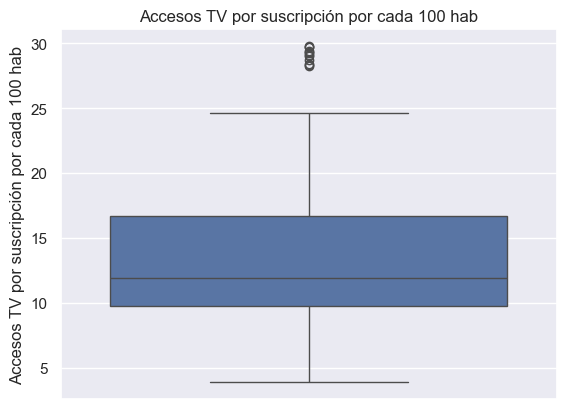

In [29]:
# Crear el boxplot.
sns.boxplot(data=penetracion_provincia_tv, y="Accesos TV por suscripción por cada 100 hab")
plt.title("Accesos TV por suscripción por cada 100 hab");

Observamos numerosos outliers por encima del bigote superior, y también por encima de los promedios vistos a nivel nacional. Esto puede ser consecuencia de las diferencias entre las provincias, por lo que graficaremos un boxplot para cada provincia.

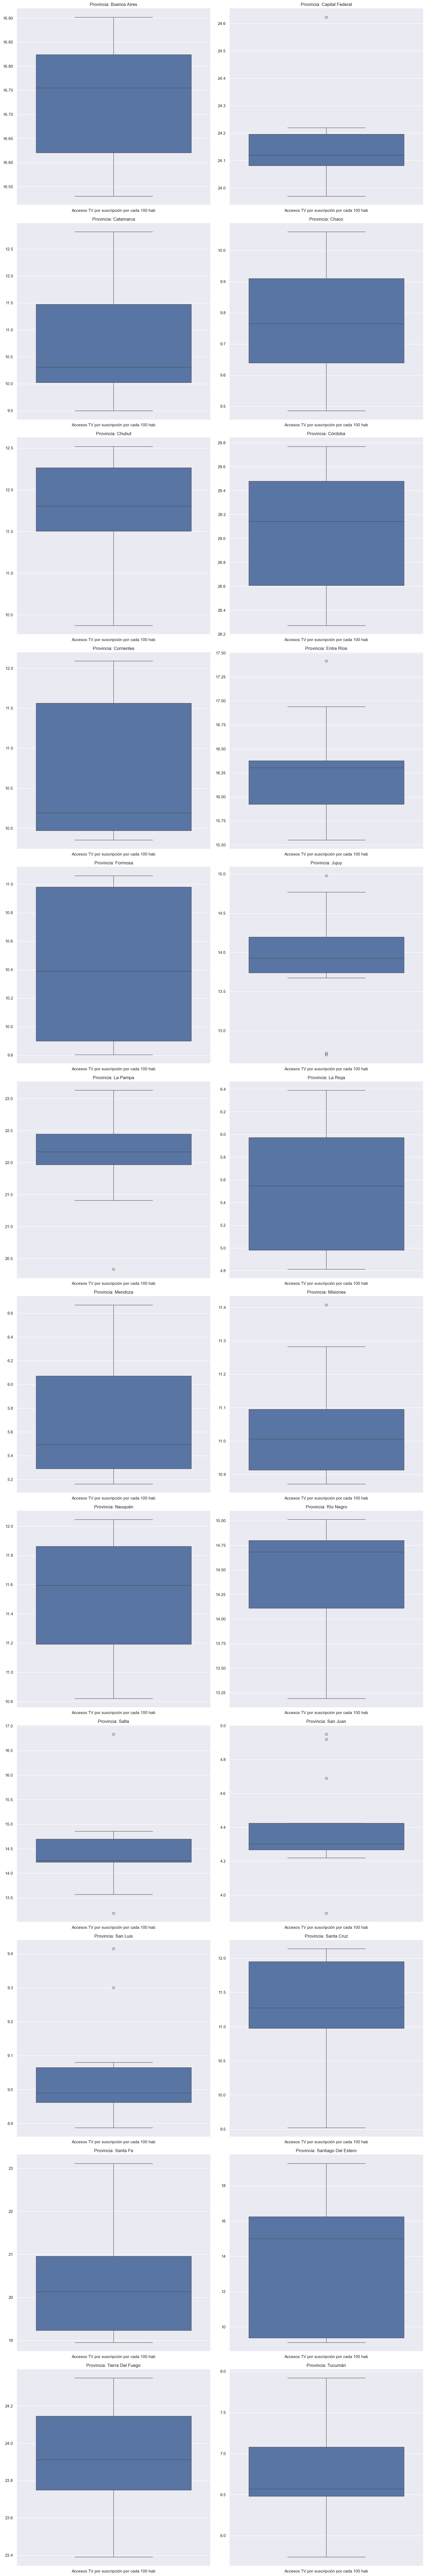

In [31]:
get_outliers_df_provincia(penetracion_provincia_tv, exclude=["Año", "Trimestre"], 
                          rotacion = 0)

Al segmentar por provincia, seguimos observando outliers en algunas de ellas. Dados los ordenes, esto parece ser mas debido a la acotada distribución de los datos que a errores en los mismos.

Vamos a crear la columna "Año-Trimestre" para evaluar la evolución de la penetración del servicio de TV por Cable por provincia.

In [32]:
# Concatenar las columnas "Año" y "Trimestre" en una nueva columna "Año-Trimestre".
penetracion_provincia_tv['Año-Trimestre'] = (
    penetracion_provincia_tv['Año'].astype(str) 
    + '-' + penetracion_provincia_tv['Trimestre'].astype(str))

# Visualizar el DataFrame con las modificaciones realizadas.
penetracion_provincia_tv.head(3)

,Año,Trimestre,Provincia,Accesos TV por suscripción por cada 100 hab,Año-Trimestre
576,2020,1,Buenos Aires,16.902025,2020-1
577,2020,1,Capital Federal,24.119482,2020-1
578,2020,1,Catamarca,9.496588,2020-1


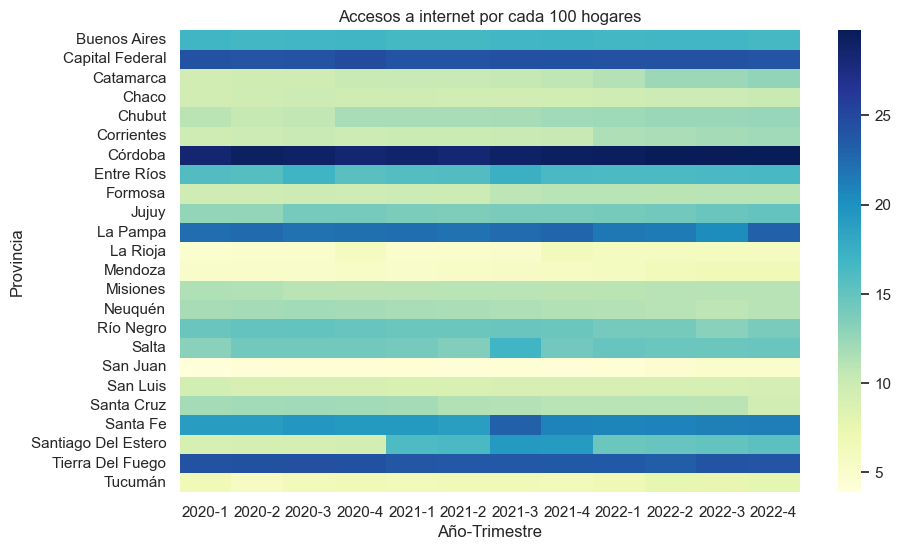

In [33]:
plt.figure(figsize=(10, 6))

# Crea el heatmap
heatmap_data = penetracion_provincia_tv.pivot(index="Provincia", columns="Año-Trimestre", values="Accesos TV por suscripción por cada 100 hab")
sns.heatmap(heatmap_data, annot=False, cmap="YlGnBu")

# Personaliza los ejes
plt.xlabel("Año-Trimestre")
plt.ylabel("Provincia")

# Agrega un título
plt.title("Accesos a internet por cada 100 hogares")

# Muestra el heatmap
plt.show()

Vemos provincias como Córdoba, Tierra Del Fuego, Capital Federal, La Pampa, en las que la penetración de la TV por Cable es mayor que en las otras provincias y que la media nacional. De igual manera, verificamos que aunque con pequeñas diferencias, la penetración ha permanecido casi constante a lo largo del tiempo para todas las provincias.

Al estancamiento en la pentración de la TV por cable, se suma crecimiento de competencias directas como las plataformas de streaming (Netflix, Disney+, Amazon Prime Video, etc). Según este [portal](https://www.elojodigital.com/contenido/19354-el-boom-de-las-plataformas-de-streaming-en-la-argentina-datos-revelan-una-tendencia), el número de suscriptores aumentó 125% en Argentina en el periodo 2021-2023. Además, según [Forbes](https://www.forbesargentina.com/negocios/gaming-streaming-industrias-impulsan-uso-internet-exportaciones-argentina-n36828), la industria del streaming, asi como la del gaming, impulsaron el uso de internet, llevando a un incremento 24% en el periodo Junio-2022 a Junio-2023, en comparación al mismo periodo entre 2021 y 2022.

La suma de todos estos factores, sostiene la conclusión de que será mas favorable para la empresa invertir en el desarrollo del servicio de Fibra óptica, más que en el de televisión por Cable.